## Correlate Spec Params & ERP measures

### Merge exp results with param results

In [2]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Dataset details
FS = 500 # sampling frequency
SESSIONS = ['L_SNR_250717', 'A_SNR_140819', 'A_SNR_041018'] # List of sessions to analyze

In [3]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
# load dfs
erp_params_df = pd.read_csv(r'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv', index_col=0)
spec_params_df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [8]:
spec_params_df

,session,channel,chan_idx,array,epoch,offset,knee,exponent,r2
0,A_SNR_041018,0,0,1,pre,8.816475,2737.235791,3.486568,0.998865
1,A_SNR_041018,1,1,1,pre,8.631928,2382.862075,3.412634,0.996765
2,A_SNR_041018,2,2,1,pre,8.151474,1142.595414,3.178614,0.996802
3,A_SNR_041018,3,3,1,pre,8.487444,2699.286151,3.391134,0.998620
4,A_SNR_041018,4,4,1,pre,8.229084,1406.120254,3.258810,0.997916
...,...,...,...,...,...,...,...,...,...
6139,L_SNR_250717,59,1019,16,post,8.072765,368.888266,2.765816,0.998221
6140,L_SNR_250717,60,1020,16,post,8.280201,823.197397,2.800549,0.999511
6141,L_SNR_250717,61,1021,16,post,8.571924,1261.398404,2.944253,0.999020
6142,L_SNR_250717,62,1022,16,post,8.790193,2288.213887,3.043717,0.998485


In [6]:
erp_params_df

,array,channel,latency,amp,widths
session,,,,,
A_SNR_041018,1,0,199.625000,44.178385,33.264859
A_SNR_041018,1,1,188.833333,51.011947,15.144748
A_SNR_041018,1,2,140.333333,41.989565,16.462565
A_SNR_041018,1,3,170.428571,44.626236,14.899585
A_SNR_041018,1,4,156.200000,44.130953,11.580743
...,...,...,...,...,...
L_SNR_250717,16,59,247.714286,62.943427,13.344690
L_SNR_250717,16,60,238.333333,62.633350,12.990668
L_SNR_250717,16,61,172.166667,61.384191,30.593013


In [6]:
# Instead, below we will compute the change in expoent
# spec_params_df = spec_params_df.loc[spec_params_df["epoch"]=="post"]
# spec_params_df


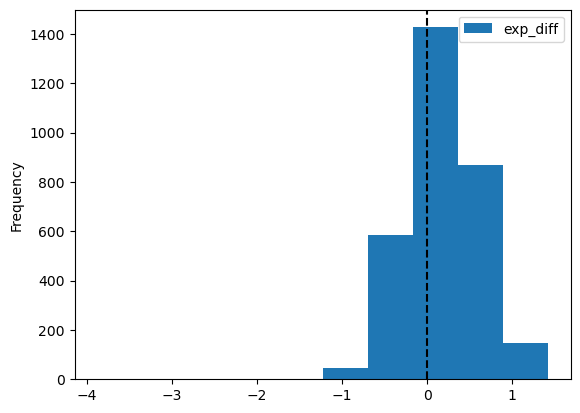

In [21]:
# compute stimulus-evoked change in exponent
df_post = spec_params_df.loc[spec_params_df["epoch"]=="post"]
df_pre = spec_params_df.loc[spec_params_df["epoch"]=="pre"]
df_merge = df_post.merge(df_pre, on=['session','channel','chan_idx','array'], suffixes=['_post', '_pre'])
df_params = df_merge.drop(columns=['epoch_pre','epoch_post'])
df_params['exp_diff'] = df_params['exponent_post'] - df_params['exponent_pre']
df_params['offset_diff'] = df_params['offset_post'] - df_params['offset_pre']

# plot
df_params.plot(y='exp_diff', kind='hist')
ax = plt.gca()
ax.axvline(0, color='k', linestyle='--')

# show df
df_params
df_params.to_csv(fr"{PROJECT_PATH}\data\results\spectral_params_diff.csv")


In [16]:
# merge dataframes
results_df = pd.merge(left=erp_params_df, right=df_params, on= ["session", "array", "channel"])
results_df.to_csv(r'G:\Shared drives\v1_v4_1024\data\results\spec_erp_results.csv')
results_df

,session,array,channel,latency,amp,widths,chan_idx,offset_post,knee_post,exponent_post,r2_post,offset_pre,knee_pre,exponent_pre,r2_pre,exp_diff,offset_diff
0,A_SNR_041018,1,0,199.625000,44.178385,33.264859,0,8.191820,823.507427,2.943896,0.998326,8.816475,2737.235791,3.486568,0.998865,-0.542673,-0.624655
1,A_SNR_041018,1,1,188.833333,51.011947,15.144748,1,8.584232,2931.311524,3.199538,0.996887,8.631928,2382.862075,3.412634,0.996765,-0.213095,-0.047696
2,A_SNR_041018,1,2,140.333333,41.989565,16.462565,2,8.439394,1957.537472,3.137555,0.997652,8.151474,1142.595414,3.178614,0.996802,-0.041059,0.287920
3,A_SNR_041018,1,3,170.428571,44.626236,14.899585,3,8.716438,3361.041106,3.330809,0.996622,8.487444,2699.286151,3.391134,0.998620,-0.060325,0.228994
4,A_SNR_041018,1,4,156.200000,44.130953,11.580743,4,8.668195,2800.127407,3.319576,0.998047,8.229084,1406.120254,3.258810,0.997916,0.060765,0.439111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,L_SNR_250717,16,59,247.714286,62.943427,13.344690,1019,8.072765,368.888266,2.765816,0.998221,7.527530,421.936825,2.804417,0.995542,-0.038601,0.545234
3068,L_SNR_250717,16,60,238.333333,62.633350,12.990668,1020,8.280201,823.197397,2.800549,0.999511,7.350936,214.690632,2.610531,0.996774,0.190018,0.929265
3069,L_SNR_250717,16,61,172.166667,61.384191,30.593013,1021,8.571924,1261.398404,2.944253,0.999020,7.973004,862.206119,3.011786,0.996864,-0.067533,0.598920
3070,L_SNR_250717,16,62,215.444444,47.475655,28.958246,1022,8.790193,2288.213887,3.043717,0.998485,8.072889,1156.365207,3.075089,0.997915,-0.031372,0.717304


### plot exp and amp

exp = y
amp = x
scatterplot
color by session

[Text(0.5, 0, 'ERP peak amplitude'), Text(0, 0.5, 'Δ LFP exponent')]

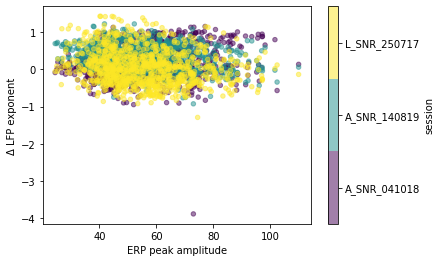

In [63]:
# changed from amp_abs to amp from this point on
results_df['session'] = pd.Categorical(results_df['session'])
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")


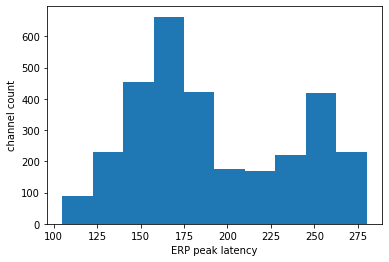

In [42]:
# plot histogram of latency
# time = np.arange(-0.3, 0.7, 1/FS) * 1000

fig, ax = plt.subplots(1,1, figsize=[6,4])
ax.hist(results_df['latency'])
ax.set(xlabel="ERP peak latency", ylabel="channel count")
plt.show()

### linear regression 


linear regression for each session
run what's needed for additional session to continue with 3

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_df["amp"], y=results_df["exp_diff"])

In [58]:
y_pred = intercept + slope*results_df["amp"]

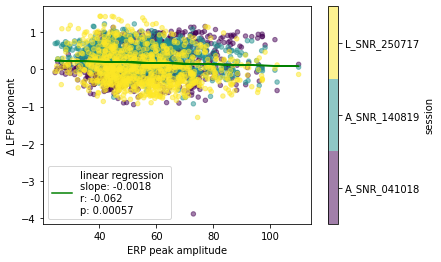

In [62]:
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
label = f"linear regression \nslope: {slope:.2} \nr: {rvalue:.2} \np: {pvalue:.2}"
ax.plot(results_df["amp"], y_pred, color="green", label=label)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
ax.legend()
plt.show()

In [48]:
colors = np.array(["red", "green"])

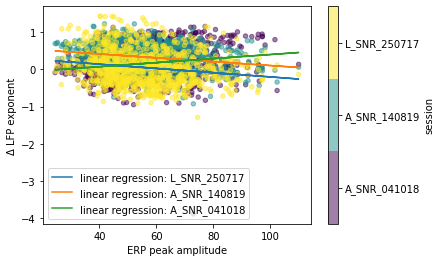

In [71]:
# create linear regression by session

# plot scatter
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)

# plot linear regression for each session
for session in SESSIONS: 
    results_session = results_df.loc[results_df["session"]==session]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp_diff"])
    y_pred = intercept + slope*results_session["amp"]

    ax.plot(results_session["amp"],y_pred, label=f"linear regression: {session}")

# label plot
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
ax.legend()

# save/show figure
#ax.figure.savefig(r"G:\Shared drives\v1_v4_1024\figures\linregress_exp_ampabs.png")
plt.show()



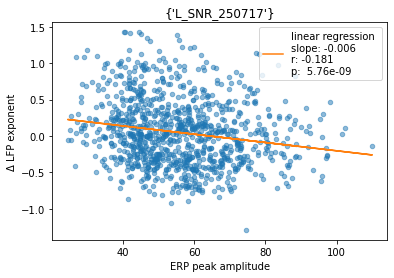

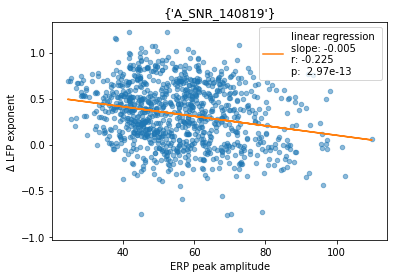

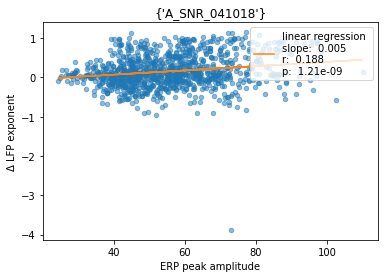

In [95]:
for session in SESSIONS:
    # get data for sessoin
    results_session = results_df.loc[results_df["session"]==session]

    # plot scatter
    fig, ax = plt.subplots(1,1, figsize=[6,4])
    results_session.plot.scatter(x="amp", y="exp_diff", alpha=0.5, ax=ax)
    
    # plot linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp_diff"])
    text_dict = dict()
    for key, var in zip(['slope', 'rvalue', 'pvalue'], [slope, rvalue, pvalue]):
        if np.abs(var) < 0.001:
            text_dict[key] = f'{var: .2e}'
        else:
            text_dict[key] = f'{var: .3f}'
    y_pred = intercept + slope*results_session["amp"]
    label = f"linear regression \nslope: {text_dict['slope']} \nr: {text_dict['rvalue']} \np: {text_dict['pvalue']}"
    ax.plot(results_session["amp"],y_pred, label=label, color="C1")

    # label plot
    ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
    ax.set_title({session})
    ax.legend(loc="upper right")

    # save/show figure
    # ax.figure.savefig(fr"G:\Shared drives\v1_v4_1024\figures\linregress_{session}.png")
    plt.show()


### Calculate difference in offset

[Text(0.5, 0, 'ERP peak amplitude'), Text(0, 0.5, 'Δ Offset')]

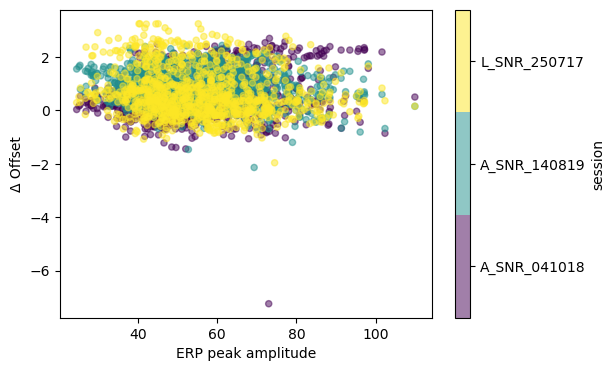

In [20]:
# changed from amp_abs to amp from this point on
results_df['session'] = pd.Categorical(results_df['session'])
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="offset_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 Offset")